# Detecting transients due to point source motion

We develop a moving point source detector on an otherwise static true image $T$ given a pair of images $R$ and $N$ (reference and new) containing gaussian background-dominated-noise. 

## Model

Our model for images $R$ and $N$ is the following

$$R = (T + \alpha\delta_q)*P_r + \epsilon_r,$$
$$N = (T + \alpha\delta_p)*P_n + \epsilon_n.$$

Here $T$ is a general unknown true background image, $\alpha$ is the observed flux of the point source which we assume to be constant, $P_r$ and $P_n$ are the point-spread-functions (which do not necessarily sum to unity) of images $R$ and $N$ and $\delta_q$ and $\delta_p$ denote Dirac delta functions centered at image positions $q$ and $p$. The additive background noise images of $R$ and $N$ are $\epsilon_r$ and $\epsilon_n$ and these are assumed to contain independent-identically-distributed (iid) per-pixel gaussian noise having zero mean and known variances, $\sigma_r^2$ and $\sigma_n^2$.

At each image position $q$ we would like our detector to test between the following two hypotheses

$$\mathcal{H_0} : q=p,$$
$$\mathcal{H_1} : q\neq p,$$

where the null hypothesis can be interpreted as saying that a moving point source does not exist in image $R$ and $N$ at position $q$. Note that under $\mathcal{H}_0$, a static point source at $q$ can equivalently be absorbed into the background image $T$. The alternative hypothesis $\mathcal{H}_1$ says that a point source, existing in image $R$ at position $q$, has translated to position $p$ in image $N$.


Motivated by the Neyman-Pearson lemma we express the likelihood-ratio of the alternative and null hypotheses to derive a most powerful test to differentiate between the two

$$LR(q;p,\alpha) = \frac{P(N,R|\mathcal{H}_1)}{P(N,R|\mathcal{H}_0)} = \frac{P(N|R,\mathcal{H}_1)}{P(N|R,\mathcal{H}_0)}\frac{P(R|\mathcal{H}_1)}{P(R|\mathcal{H}_0)} = \frac{P(N|R,\mathcal{H}_1)}{P(N|R,\mathcal{H}_0)},$$

where we have used Bayes' theorem in the second equality and the fact that the probability distribution of $R$ is insensitive to which hypothesis is valid in the third.

Using the following definition of the discrete Fourier transform (DFT) of an $n\times n$ pixel image $f[x,y]$

$$\mathcal{F}[f] = \hat{f}[k_x, k_y] = \sum_{x=0}^{n-1} \sum_{y=0}^{n-1} f[x,y] \exp\left(-2\pi i\frac{\vec{k}\cdot\vec{q}}{n}\right),$$
we transform $R$ and $N$, apply the convolution theorem and eliminate $\hat{T}$ to obtain

<!---
$$\hat{R} = \left(\hat{T}+\alpha\hat{\delta}_q\right)\hat{P}_r + \hat{\epsilon}_r$$
$$\hat{N} = \left(\hat{T}+\alpha\hat{\delta}_p\right)\hat{P}_n + \hat{\epsilon}_n$$
$$\hat{T} = \left(\hat{R}-\hat{\epsilon}_r\right)/\hat{P}_r - \alpha\hat{\delta}_q$$
-->

$$\hat{N} = \left[\frac{\hat{R}-\hat{\epsilon}_r}{\hat{P}_r} + \alpha \left(\hat{\delta}_p - \hat{\delta}_q \right)\right] \hat{P}_n + \hat{\epsilon}_n .$$


We now use the fact that the DFT of an $n\times n$ Gaussian noise image $\epsilon \sim N(0, \sigma^2)$, having iid pixels, is a complex valued $n\times n$ random variable $\hat{\epsilon} \sim N(0, n^2\sigma^2/2 )$ with iid real and imaginary frequency coefficients. We can therefore express the log-likelihood of the new frequency image conditioned on the reference image and under $\mathcal{H_0}$ as 

$$\log P(\hat{N}|\hat{R},\mathcal{H}_0) = -\sum_{k_x, k_y} \frac{|\hat{N} - hat{R}\hat{P}_n/\hat{P}_r|^2}{2\mathrm{Var}(\hat{\epsilon}_n + \hat{\epsilon}_r\hat{P}_n/\hat{P}_r)} = -\frac{1}{n^2} \sum_{k_x, k_y} \frac{|\hat{P}_r\hat{N} - \hat{P}_n \hat{R}|^2}{|\hat{P}_r|^2\sigma_n^2 + |\hat{P}_n|^2\sigma_r^2} \equiv {LL}_0,$$

and likewise under $\mathcal{H_1}$ we obtain

$$\log P(\hat{N}|\hat{R},\mathcal{H}_1) = -\frac{1}{n^2} \sum_{k_x, k_y} \frac{|\hat{P}_r\hat{N} - \hat{P}_n \hat{R} + \alpha \hat{P}_n\hat{P}_r(\hat{\delta}_p - \hat{\delta}_q)|^2}{|\hat{P}_r|^2\sigma_n^2 + |\hat{P}_n|^2\sigma_r^2} \equiv {LL}_1.$$


Writing $a = \hat{P}_r\hat{N} - \hat{P}_n \hat{R}$ and $b = \alpha \hat{P}_n\hat{P}_r(\hat{\delta}_p - \hat{\delta}_q)$ we can express the log-likelihood-ratio as follows

$$LLR = {LL}_1 - {LL}_0 = -\frac{1}{n^2} \sum_{k_x, k_y} \frac{|b|^2 + 2\mathrm{Re}[a\bar{b}]}{|\hat{P}_r|^2\sigma_n^2 + |\hat{P}_n|^2\sigma_r^2}$$

Defining $\vec{\Delta} \equiv \vec{p} - \vec{q}$, this last expression can be simplified by keeping only terms first order in $\vec{k}\cdot\vec{\Delta}$

$$\hat{\delta}_p - \hat{\delta}_q = e^{-2\pi i\vec{k}\cdot\vec{p}/n} - e^{-2\pi i\vec{k}\cdot\vec{q}/n} = e^{-2\pi i\vec{k}\cdot\vec{q}/n}\left(e^{-2\pi i\vec{k}\cdot\vec{\Delta}/n} - 1\right) \approx \frac{-2\pi i (\vec{k}\cdot\vec{\Delta})}{n} e^{-2\pi i\vec{k}\cdot\vec{q}/n}$$

$$\mathrm{Re}[a\bar{b}] \approx -\frac{2\pi \alpha \vec{k}\cdot\vec{\Delta}}{n}\mathrm{Im} \left[\bar{\hat{P}}_n \bar{\hat{P}}_r(\hat{P}_r\hat{N} - \hat{P}_n \hat{R}) e^{2\pi i\vec{k}\cdot\vec{q}/n}\right]$$

$$LLR \approx -\frac{1}{n^2} \sum_{k_x, k_y} \frac{2\mathrm{Re}[a\bar{b}]}{|\hat{P}_r|^2\sigma_n^2 + |\hat{P}_n|^2\sigma_r^2} =\alpha\vec{\Delta}\cdot\mathrm{Im}\left\{\frac{1}{n^2}\sum_{k_x, k_y} \left[\frac{4\pi\vec{k}}{n}\frac{\bar{\hat{P}}_n \bar{\hat{P}}_r(\hat{P}_r\hat{N} - \hat{P}_n \hat{R})}{|\hat{P}_r|^2\sigma_n^2 + |\hat{P}_n|^2\sigma_r^2}\right] e^{2\pi i\vec{k}\cdot\vec{q}/n}\right\},$$

where we used the fact that $|b|^2 = O((\vec{k}\cdot{\vec{\Delta}})^2)$ in the first equality of the third line.

Defining the following two component frequency image

$$\vec{\hat{z}}\equiv \frac{4\pi\vec{k}}{n}\frac{\bar{\hat{P}}_n \bar{\hat{P}}_r(\hat{P}_r\hat{N} - \hat{P}_n \hat{R})}{|\hat{P}_r|^2\sigma_n^2 + |\hat{P}_n|^2\sigma_r^2},$$

and identifying the inverse DFT in the last expression for the $LLR$, we find (to first order in $\vec{k}\cdot\vec{\Delta}$) that

$$LLR(q;\alpha\vec{\Delta}) = \alpha\vec{\Delta}\cdot\mathrm{Im}\left\{\mathcal{F}^{-1}\left[\vec{\hat{z}}\right]\right\} = \alpha\mathrm{Im}(\Delta_x z_x + \Delta_y z_y).$$

We see that this statistic does not differentiate between a large constant flux of the point source ($\alpha$) and a large possible translation ($\|\vec{\Delta}\|$). This is at least the case to first order in $\vec{k}\cdot\vec{\Delta}$. 

Generally, we expect this approximation to break down when $\hat{z}$ contains significant power at frequencies $\vec k$ that are large in the direction of the $\vec\Delta$. 

## Performance evaluation

We now test the performance of this statistic and compare it to the "Proper image subtraction" statistic. Proper image subtraction was designed to be an optimal detector of a general local change in flux and does not assume the transient is due to a translating point source. We thus expect that the optimality of the "Translient" statistic, in this specific translational data generation process, would lead to enhanced detector performance.

In [1]:
import math as ma
import numpy as np
import matplotlib.pyplot as plt

from utils import gaussian_profile, z_statistic

In [2]:
n = 128

q = np.array([n/2, n/2])
cxx_r, cxx_n = 5, 5
cyy_r, cyy_n = 3, 3
cth_r, cth_n = ma.pi/2, 0

sig_r = 0.001
sig_n = 0.001

Delta = np.array([1, -1]) * 0.5
alpha = 2.5
beta = 2.5

amb = alpha - beta
apb_Delta = (alpha + beta)*np.linalg.norm(Delta)
theta = ma.atan2(Delta[1], Delta[0])

x0_r, y0_r = (q + Delta)
x0_n, y0_n = (q - Delta)

R = alpha*gaussian_profile(x0_r, y0_r, [n, n], cxx_r, cyy_r, cth_r) + np.random.randn(n, n)*sig_r
N = beta *gaussian_profile(x0_n, y0_n, [n, n], cxx_n, cyy_n, cth_n) + np.random.randn(n, n)*sig_n
P_r = gaussian_profile(n/2, n/2, [n, n], cxx_r, cyy_r, cth_r)
P_n = gaussian_profile(n/2, n/2, [n, n], cxx_n, cyy_n, cth_n)

z_x, z_y = z_statistic(R, N, P_r, P_n, sig_r, sig_n)

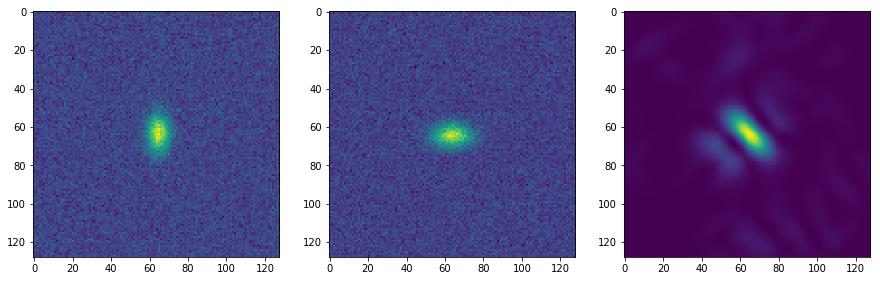

In [3]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1); plt.imshow(R)
plt.subplot(1,3,2); plt.imshow(N)
plt.subplot(1,3,3); plt.imshow(z_x**2 + z_y**2)
plt.savefig('figures/z_stat.pdf', bbox_inches='tight')